In [4]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test_full, y_test_full) = tf.keras.datasets.fashion_mnist.load_data()

X = X_train_full.astype('float32') / 255.0
y = y_train_full

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=10, stratify=y
)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

num_classes = 10
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Kodilla\kurs\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.1,
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/30
760/760 - 11s - 15ms/step - accuracy: 0.7906 - loss: 0.5794 - val_accuracy: 0.8643 - val_loss: 0.3652
Epoch 2/30
760/760 - 9s - 12ms/step - accuracy: 0.8660 - loss: 0.3736 - val_accuracy: 0.8937 - val_loss: 0.2972
Epoch 3/30
760/760 - 9s - 12ms/step - accuracy: 0.8815 - loss: 0.3234 - val_accuracy: 0.9020 - val_loss: 0.2683
Epoch 4/30
760/760 - 8s - 11ms/step - accuracy: 0.8935 - loss: 0.2903 - val_accuracy: 0.9100 - val_loss: 0.2521
Epoch 5/30
760/760 - 8s - 11ms/step - accuracy: 0.9028 - loss: 0.2637 - val_accuracy: 0.9137 - val_loss: 0.2392
Epoch 6/30
760/760 - 8s - 11ms/step - accuracy: 0.9090 - loss: 0.2451 - val_accuracy: 0.9196 - val_loss: 0.2237
Epoch 7/30
760/760 - 9s - 12ms/step - accuracy: 0.9170 - loss: 0.2270 - val_accuracy: 0.9222 - val_loss: 0.2212
Epoch 8/30
760/760 - 9s - 12ms/step - accuracy: 0.9197 - loss: 0.2128 - val_accuracy: 0.9219 - val_loss: 0.2142
Epoch 9/30
760/760 - 10s - 14ms/step - accuracy: 0.9275 - loss: 0.1946 - val_accuracy: 0.9244 - val_los

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"\n✅ Accuracy na danych testowych: {test_accuracy:.4f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0935 - loss: 2.3094 

✅ Accuracy na danych testowych: 0.1000


etap2 

In [7]:
model.save("fashion_mnist_model.keras")

from tensorflow.keras.models import load_model
model = load_model("fashion_mnist_model.keras")

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Kodilla\kurs\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [8]:
nazwy_klas = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def pokaz_predykcje(indeks, zbior_obrazow=X_test, zbior_etykiet=y_test):
    obraz = zbior_obrazow[indeks]
    etykieta = zbior_etykiet[indeks]

    obraz_wejscie = np.expand_dims(obraz, axis=0) 
    przewidywana_klasa = np.argmax(model.predict(obraz_wejscie, verbose=0))

    plt.imshow(obraz.squeeze(), cmap="gray")
    plt.title(f"🧠 Predykcja: {nazwy_klas[przewidywana_klasa]}\n🎯 Prawidłowa: {nazwy_klas[etykieta]}")
    plt.axis("off")
    plt.show()

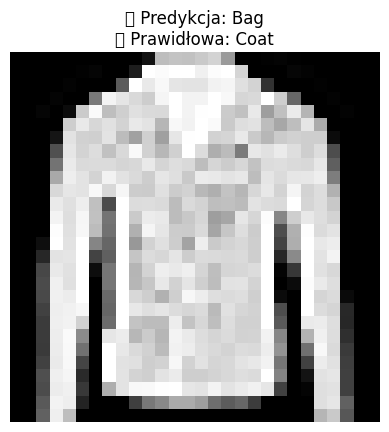

In [12]:
pokaz_predykcje(7)


In [21]:
import albumentations as A
from albumentations.core.composition import OneOf
from albumentations.pytorch import ToTensorV2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import fashion_mnist
(images, labels), (images_test, labels_test) = fashion_mnist.load_data()
images = images.astype("float32") / 255.0
images = np.expand_dims(images, -1)  # (60000, 28, 28, 1)


X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.1, random_state=10, stratify=labels
)


from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [23]:
transform = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.8),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussNoise(p=0.3),
])

def augment_batch(X, y, batch_size=64):
    while True:
        idxs = np.random.choice(len(X), batch_size)
        X_batch = X[idxs]
        y_batch = y[idxs]

        X_aug = np.empty_like(X_batch)
        for i in range(batch_size):
            aug = transform(image=X_batch[i])
            X_aug[i] = aug['image']

        yield X_aug, y_batch


In [24]:
model_aug = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_aug.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model_aug.fit(
    augment_batch(X_train, y_train_cat, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_test, y_test_cat),
    epochs=30,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/30
843/843 - 16s - 19ms/step - accuracy: 0.7001 - loss: 0.8015 - val_accuracy: 0.8238 - val_loss: 0.4770
Epoch 2/30
843/843 - 15s - 18ms/step - accuracy: 0.7721 - loss: 0.6067 - val_accuracy: 0.8510 - val_loss: 0.4131
Epoch 3/30
843/843 - 17s - 20ms/step - accuracy: 0.7875 - loss: 0.5660 - val_accuracy: 0.8647 - val_loss: 0.3643
Epoch 4/30
843/843 - 18s - 21ms/step - accuracy: 0.7974 - loss: 0.5378 - val_accuracy: 0.8683 - val_loss: 0.3495
Epoch 5/30
843/843 - 21s - 24ms/step - accuracy: 0.8094 - loss: 0.5113 - val_accuracy: 0.8812 - val_loss: 0.3256
Epoch 6/30
843/843 - 22s - 26ms/step - accuracy: 0.8142 - loss: 0.4964 - val_accuracy: 0.8785 - val_loss: 0.3235
Epoch 7/30
843/843 - 22s - 26ms/step - accuracy: 0.8174 - loss: 0.4890 - val_accuracy: 0.8812 - val_loss: 0.3089
Epoch 8/30
843/843 - 30s - 35ms/step - accuracy: 0.8230 - loss: 0.4699 - val_accuracy: 0.8875 - val_loss: 0.3028
Epoch 9/30
843/843 - 23s - 27ms/step - accuracy: 0.8249 - loss: 0.4617 - val_accuracy: 0.8917 - 

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9146 - loss: 0.2326 

✅ Accuracy z augmentacją: 0.9122


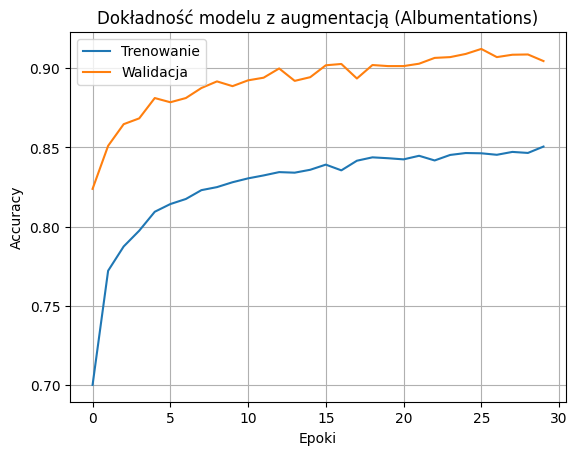

In [26]:
test_loss, test_acc = model_aug.evaluate(X_test, y_test_cat)
print(f"\n✅ Accuracy z augmentacją: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='Trenowanie')
plt.plot(history.history['val_accuracy'], label='Walidacja')
plt.title("Dokładność modelu z augmentacją (Albumentations)")
plt.xlabel("Epoki")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
model_aug.save("model_fashion_aug.keras")
print("Model zapisany jako model_fashion_aug.keras")


Model zapisany jako model_fashion_aug.keras


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

labels_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

def pokaz_predykcje(idx, model=None):
    if model is None:
        model = model_loaded  

    obraz = X_test[idx]
    obraz_input = np.expand_dims(obraz, axis=0)  
    pred = model.predict(obraz_input, verbose=0)
    label_pred = np.argmax(pred)
    label_true = y_test[idx]

    plt.figure(figsize=(4, 4))
    plt.imshow(obraz.squeeze(), cmap='gray')
    plt.title(f"Prawdziwa: {labels_dict[label_true]}\nPredykcja: {labels_dict[label_pred]}")
    plt.axis('off')
    plt.show()


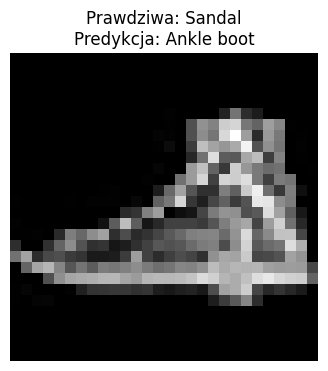

In [29]:
pokaz_predykcje(42, model=model_aug)  

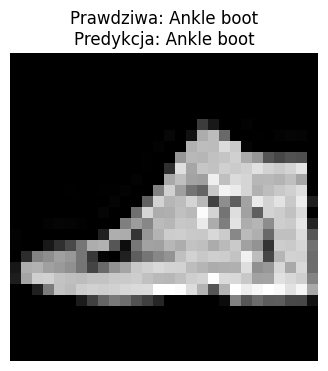

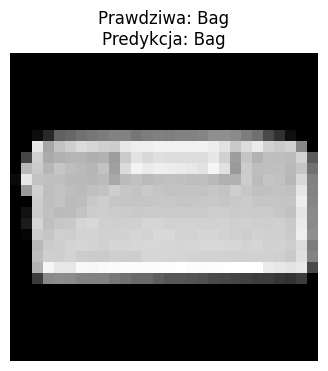

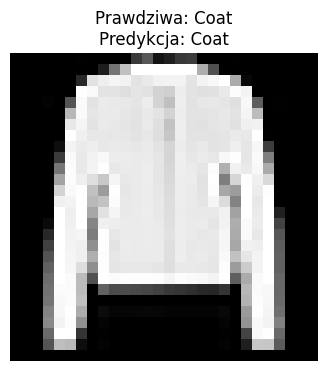

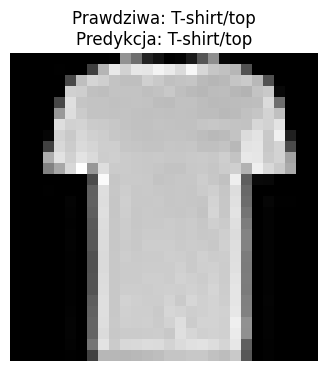

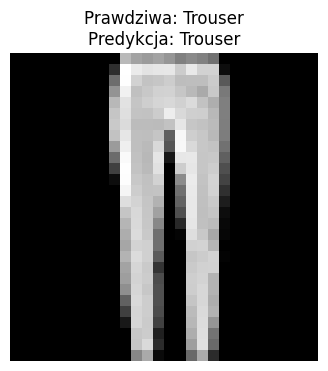

In [29]:
for i in np.random.choice(len(X_test), 5, replace=False):
    pokaz_predykcje(i, model=model_aug)